In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding

In [6]:
max_features =10000
max_len = 200
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)
x_train = sequence.pad_sequences(x_train,max_len)
x_test = sequence.pad_sequences(x_test,max_len)

In [11]:
def create_model():
  model = models.model = Sequential([
    Embedding(max_features, 128),
    SimpleRNN(128, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
  return model

In [12]:
model = create_model()
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
histories = model.fit(x_train,y_train,
                      epochs =10,batch_size = 32,
                      validation_split = 0.2, verbose = 1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5480 - loss: 0.6994 - val_accuracy: 0.7088 - val_loss: 0.5580
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7311 - loss: 0.5514 - val_accuracy: 0.7852 - val_loss: 0.4871
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6087 - loss: 0.6682 - val_accuracy: 0.7028 - val_loss: 0.5735
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7687 - loss: 0.4996 - val_accuracy: 0.7488 - val_loss: 0.5456
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6927 - loss: 0.5729 - val_accuracy: 0.7100 - val_loss: 0.5693
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6133 - loss: 0.6677 - val_accuracy: 0.6132 - val_loss: 0.6393
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.6740 - loss: 0.5919 - val_accuracy: 0.6528 - val_loss: 0.6182
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7431 - loss: 0.5230 - 

In [14]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Training accuracy: {round(test_accuracy*100,2)}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7535 - loss: 0.5297
Training accuracy: 75.7%


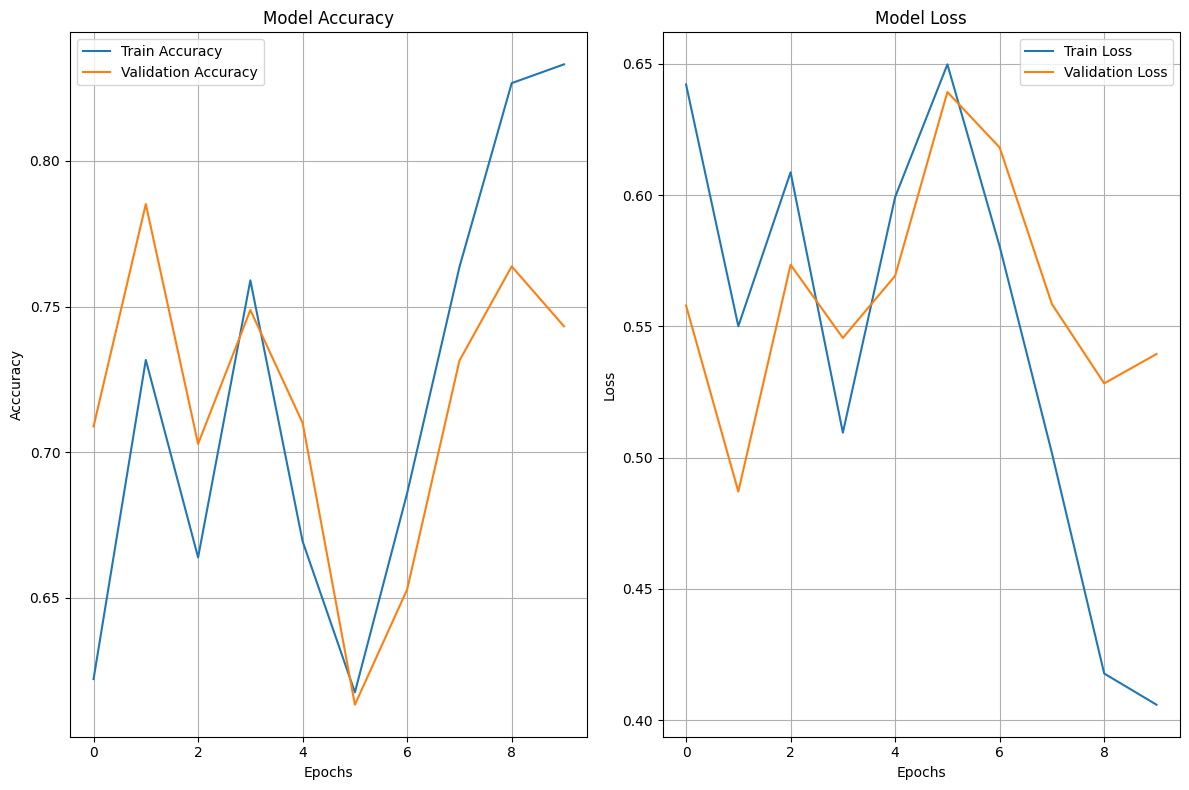

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(histories.history['accuracy'], label = 'Train Accuracy')
plt.plot(histories.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(histories.history['loss'], label = 'Train Loss')
plt.plot(histories.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
def decode_review(review):
    return " ".join([reverse_word_index.get(i - 3, "?")
for i in review])

def preprocess_reviews(reviews):
    encoded_reviews = []
    for review in reviews:
        encoded_review = [word_index.get(word.lower(), 0) + 3 for word in review.split()]
        encoded_reviews.append(encoded_review)
    return sequence.pad_sequences(encoded_reviews, maxlen=max_len)

sample_reviews = [
    "This movie was fantastic! I loved it.",
    "I didn't like this film at all. It was boring and too long.",
    "An average film, nothing special."
]

encoded_sample_reviews = preprocess_reviews(sample_reviews)
predictions = model.predict(encoded_sample_reviews)
predicted_classes = (predictions > 0.5).astype("int32")

for review, prediction in zip(sample_reviews, predicted_classes):
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    print(f"Review: {review}\nPredicted sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Review: This movie was fantastic! I loved it.
Predicted sentiment: Negative

Review: I didn't like this film at all. It was boring and too long.
Predicted sentiment: Negative

Review: An average film, nothing special.
Predicted sentiment: Negative

